24


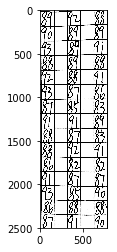

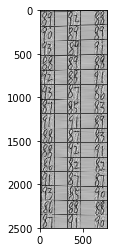

In [3]:
%matplotlib inline
import cv2,numpy as np
from matplotlib import pyplot as plt 

img=cv2.imread('test.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = img.astype(np.float)
colmean = img.mean(axis=0)
colmax = img.max(axis=0)
colmin = img.min(axis=0)
for i in range(0,img.shape[1]):
    img[:,i]-=colmean[i]
    maxV = img[:,i].max()
    minV = img[:,i].min()
    leng = maxV-minV
    img[:,i]=(img[:,i]-minV)/leng
 
U,s,V=np.linalg.svd(img)
threv = 50
index = s<threv
#print index
index = np.where(index!=False)
index = index[0][0]
print(index)
Um = U
Um[:,index:]=0
Vm = V
Vm[index:,:]=0
S=s[s>threv]
Sm = np.zeros(img.shape)
Sm[:len(S),:len(S)]= np.diag(S)
res = np.dot(Um,np.dot(Sm,Vm))
fig = plt.figure(1)
plt.imshow(img,cmap='gray')
fig = plt.figure(2)
plt.imshow(res,cmap='gray')
plt.show()